In [1]:
import sys

import math

sys.path.append('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\myPy')  
sys.path.append('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\AblationSims')
sys.path.append('C:\\Users\\Vandiver\\Documents\\HiFU\\code\\BioHeatCpp\\PBHEswig\\x64')

import numpy as np
import geom
import matplotlib.image as image
import matplotlib.pyplot as plt
import matplotlib as mpl

import MRDataAnalysis
from MRDataAnalysis import rescale as rescaleIm
from imagemanip import fwhm1D

import pandas
import nibabel

def vectorstr2arr(panda_vec_string,dtype=np.float):
    return np.array(list(map(float,panda_vec_string[1:-1].split())), dtype=dtype)

In [54]:
parfile1 = "/Users/vchaplin/Data/7T/20170112/XMLPARREC/Caskey_99999_08_01_10.17.54_(WIP_WIP_TemperatureMapping).PAR"
parfile1 = "/Users/vchaplin/Data/7T/20170206/XMLPARREC/Caskey_999999_04_01_19.14.39_(WIP_WIP_TemperatureMapping_transverse).PAR"

In [55]:
imgObj=nibabel.load(parfile1,scaling='fp')
imgData=imgObj.get_data()

header=imgObj.get_header()
numdyns = header.general_info['max_dynamics']

Taffine=imgObj.header.get_affine()
invTempAffine=np.linalg.inv(Taffine)

In [56]:
(M1,R1,I1,P1)=MRDataAnalysis.parse_scan_parts(imgData,num_parts=4)

(Nx,Ny,Nz,numdyns)=M1.shape

In [57]:
complexImgSeries = R1 + 1j*I1
    
TE_ms = 10
B0_T = 7.0
ang2temp = 1.0 / (42.576*0.01*B0_T*TE_ms*1e-3*2*math.pi)
    
basedynes=[0,1]
baseline=np.mean( complexImgSeries[:,:,:,basedynes], axis=3 ) 

tempSeries = np.zeros(complexImgSeries.shape)

for dn in range(0,numdyns):
    tempSeries[:,:,:,dn] = ang2temp*np.angle( baseline * np.conj(complexImgSeries[:,:,:,dn]) )

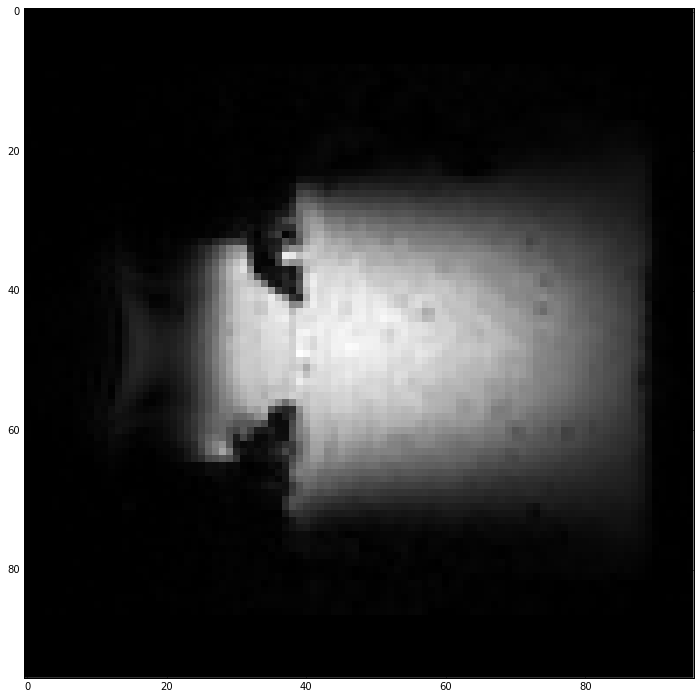

In [180]:
plt.figure(figsize=(12,12))
plt.imshow(M1[:,:,3,0],interpolation="none",cmap=image.cm.gray)

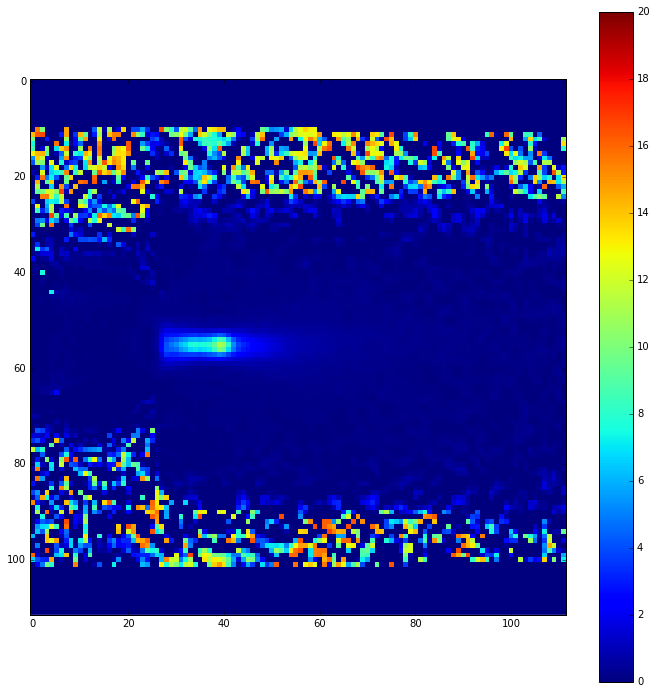

In [58]:
plt.figure(figsize=(12,12))
plt.imshow(tempSeries[:,:,2,4],vmin=0,vmax=20,interpolation='none')
plt.colorbar()

In [59]:
niftiout=nibabel.Nifti1Image(tempSeries[:,:,:,4],imgObj.affine)
nibabel.save(niftiout, '/Users/vchaplin/Data/7T/20170206/s04_temp.nii')

In [2]:
arfifile = "/Users/vchaplin/Data/7T/20170206/XMLPARREC/Caskey_999999_05_01_19.27.23_(WIP_ARFI_standardparams).PAR"
arfiObj=nibabel.load(arfifile,scaling='fp')
arfiData=arfiObj.get_data()

(M1,R1,I1,P1)=MRDataAnalysis.parse_scan_parts(arfiData,num_parts=4)

complexIm = R1+1j*I1
phaseChange = np.angle(complexIm[:,:,:,0]*np.conjugate(complexIm[:,:,:,1]))

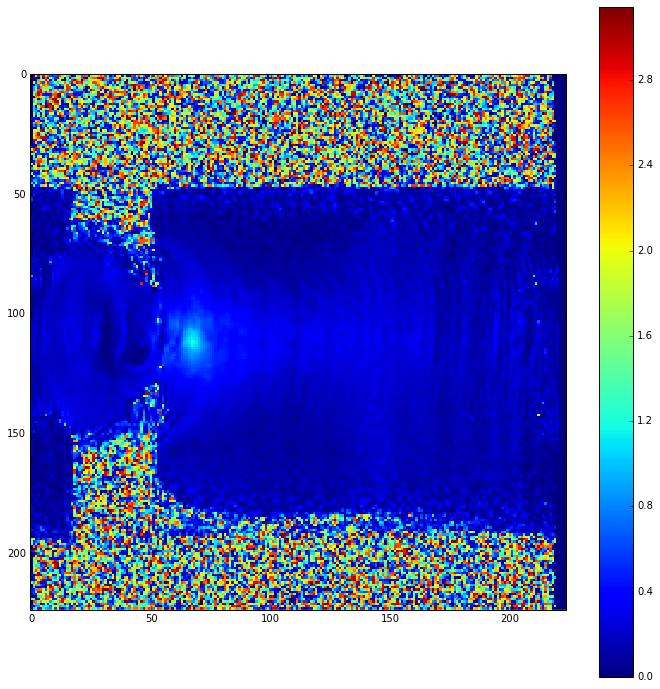

In [12]:
plt.figure(figsize=(12,12))
plt.imshow(np.abs(phaseChange[:,:,4]),interpolation='none')
plt.colorbar()

In [34]:
phaseChange.shape

(224, 224, 5)

In [4]:
%matplotlib inline

In [34]:
arfifile = "/Users/vchaplin/Data/7T/20170206/XMLPARREC/Caskey_999999_07_01_19.53.17_(WIP_ARFI_standardparams_sagittal).PAR"
arfiObj=nibabel.load(arfifile,scaling='fp')
arfiData=arfiObj.get_data()

(M1,R1,I1,P1)=MRDataAnalysis.parse_scan_parts(arfiData,num_parts=4)

complexIm = R1+1j*I1
phaseChange = np.angle(complexIm[:,:,:,0]*np.conjugate(complexIm[:,:,:,1]))

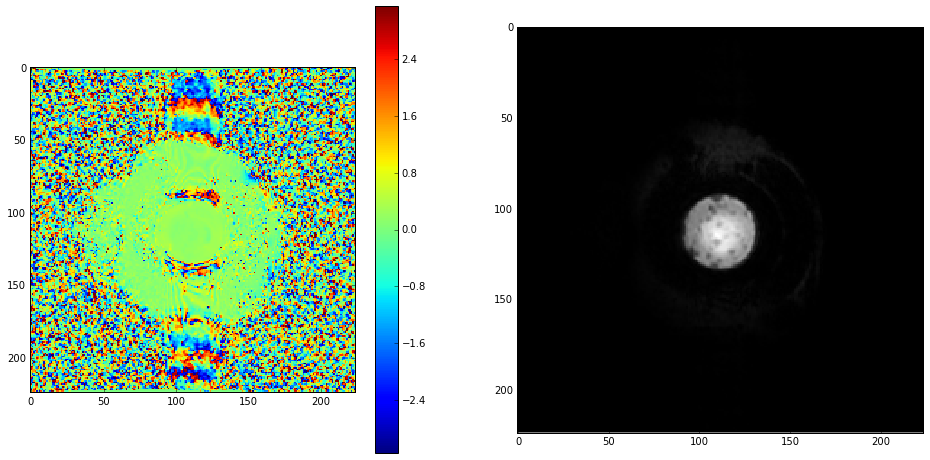

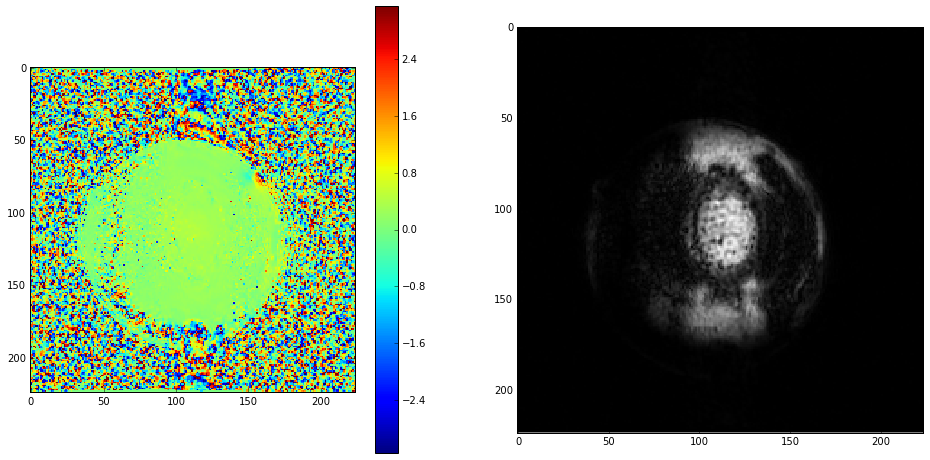

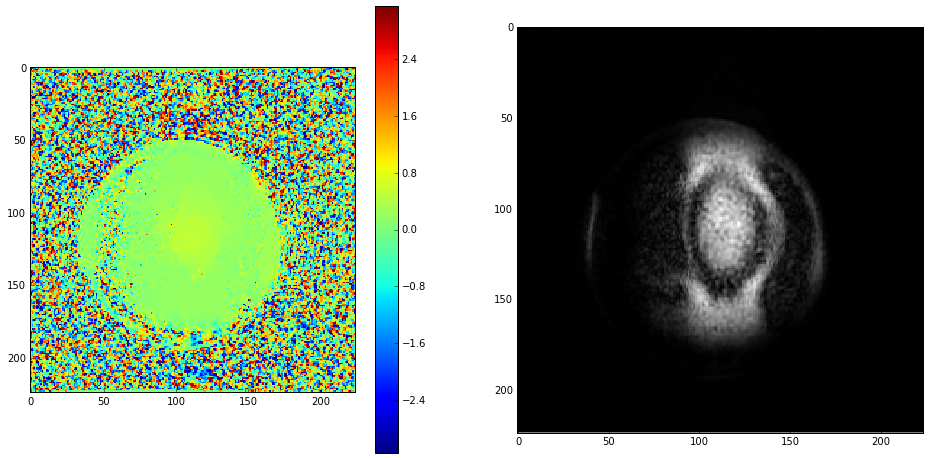

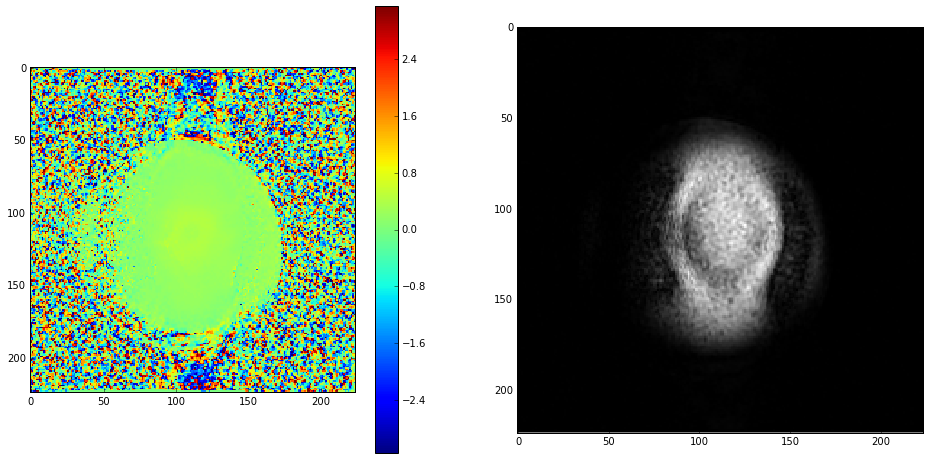

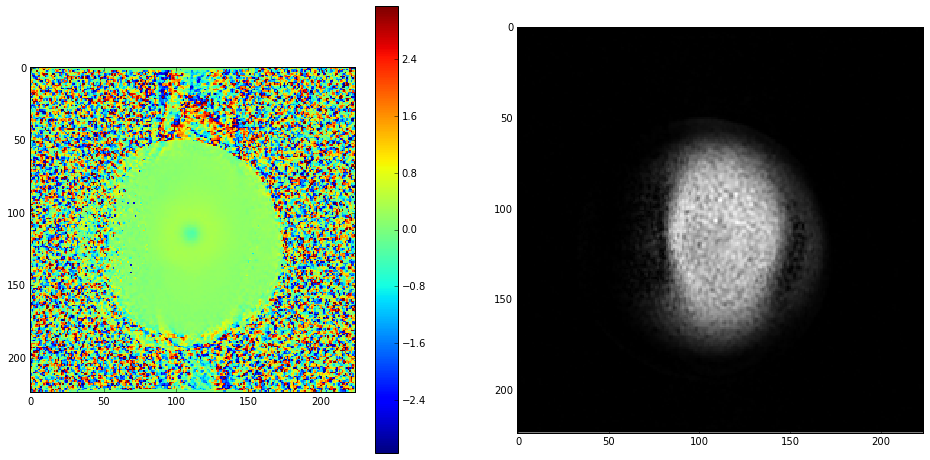

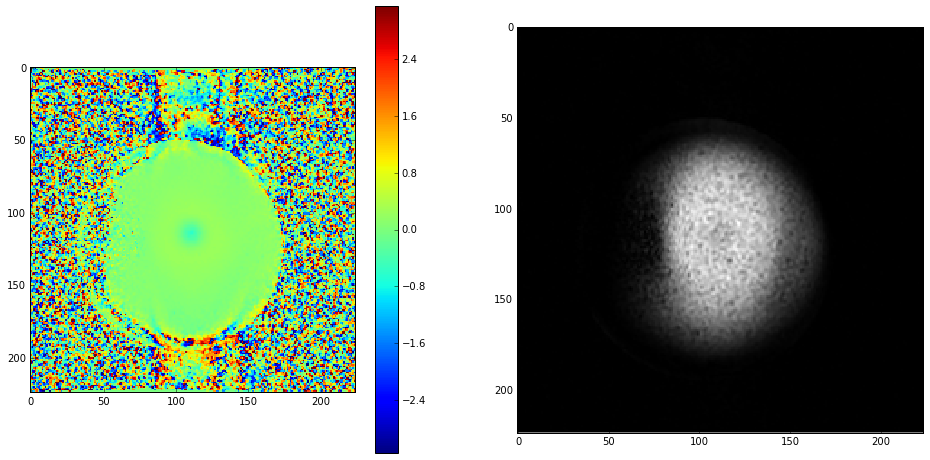

In [36]:
sii=1
for sii in range(0,6):
    plt.figure(figsize=(16,8))
    plt.subplot(121)
    plt.imshow(phaseChange[:,:,sii],interpolation='none')
    plt.colorbar()
    plt.subplot(122)
    plt.imshow(M1[:,:,sii,0],interpolation='none',cmap=image.cm.gray)
#plt.show()

In [283]:
M1.shape

(224, 224, 5, 2)

In [37]:
niftiout=nibabel.Nifti1Image(phaseChange,arfiObj.affine)

In [38]:
nibabel.save(niftiout, '/Users/vchaplin/Data/7T/20170206/s07_arfi_cor.nii')

In [173]:
file = "/Users/vchaplin/Data/7T/20170119/XMLPARREC/Caskey999_09_01_09.48.23_(WIP_WIP_THRIVE_supine_1mmACQ_NSA3).PAR"
file = "/Users/vchaplin/Data/7T/20170119/chapliv.DICOM.01-20-2017_09.08.46AM/XMLPARREC/Caskey999_09_01_09.48.23_(WIP_WIP_THRIVE_supine_1mmACQ_NSA3).PAR"

Obj=nibabel.load(file,scaling='fp')
#thriveData = Obj.get_data().reshape((Obj.shape[0], Obj.shape[1],Obj.shape[2]*Obj.shape[3]) )
thriveData = Obj.get_data()
niftiout=nibabel.Nifti1Image(thriveData,Obj.affine)
nibabel.save(niftiout, '/Users/vchaplin/Data/7T/20170119/XMLPARREC/s09_thrive.nii')